## Create large 2D phantom

This notebook creates a (relatively) large 2D phantom for testing purposes (specifically right now testing cellpose GUI) 

In [43]:
import matplotlib.pyplot as plt
from tnia.simulation.phantoms import random_circles
from tnia.deconvolution import psfs
from tnia.deconvolution import forward
import numpy as np
from tnia.plotting.plt_helper import imshow_multi2d
from pathlib import Path

tnia_images_path = Path(r'D:/images')
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_01_25_cellpose_gpu_bigimage')

## Create Phantom with random circles

In [44]:
phantom = np.zeros((3789, 3789), dtype=np.float32)
random_circles(phantom, 500, 10, 50, 10, 40)
phantom.min(), phantom.max()

(0.0, 94.0)

## Create a PSF

The exact parameters don't matter for now.  This will be used to blur the phantom a bit, but the main purpose in this case is just to test memory usage.  (In the future to test performance for different imaging scenarios the blur might be more important)

In [31]:

n = 200
wavelength = 500
na=1.4
pixel_size = 20

psf=psfs.paraxial_psf(n, wavelength, na, pixel_size)
psf.sum()

c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deconvolution\psfs.py:185: ComplexWarning: Casting complex values to real discards the imaginary part
  psf = fftshift(ifftn(ifftshift(otf)).astype(np.float32))


1.0

## Apply forward imaging model

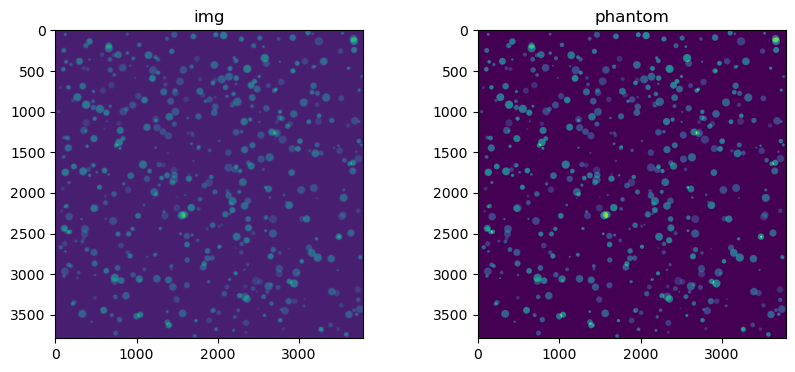

In [37]:
img = forward.forward(phantom, psf,10,True, True).astype(np.float32)
fig = imshow_multi2d([img, phantom], ["img", "phantom"], 1, 2)

## Inspect images in Napari

In [38]:
import napari
viewer = napari.Viewer()
viewer.add_image(img.astype(np.uint16))
viewer.add_image(phantom.astype(np.uint16))

<Image layer 'Image [1]' at 0x1fa29f68eb0>

## Save images

In [42]:
from skimage.io import imsave
imsave(parent_path / 'phantom.tif', phantom.astype(np.uint16))
imsave(parent_path / 'img.tif', img.astype(np.uint16))

C:\Users\bnort\AppData\Local\Temp\ipykernel_16484\2002632890.py:2: UserWarning: D:\images\tnia-python-images\imagesc\2024_01_25_cellpose_gpu_bigimage\phantom.tif is a low contrast image
  imsave(parent_path / 'phantom.tif', phantom.astype(np.uint16))
C:\Users\bnort\AppData\Local\Temp\ipykernel_16484\2002632890.py:3: UserWarning: D:\images\tnia-python-images\imagesc\2024_01_25_cellpose_gpu_bigimage\img.tif is a low contrast image
  imsave(parent_path / 'img.tif', img.astype(np.uint16))
